# matplotlib

## Introducción

matplotlib es una libreria para hacer gráficos de arrays en Python. A pesar de que tuvo sus origines emuladando los comandos graficos de MATLAB® [\*], es independiente de este, y puede usarse de una manera "Pytonica" orientada a objetos. Aunque matplotlib esta escrito principalmente en Python puro, hace uso extensivo de NumPy y otras extensiones de código para proveer una buena performace incluso para grandes arrays.  

matplotlib esta diseñado con la filosofía de que se pueden crear gráficos simples con solo algunas líneas de comandos ¡o solo una! Si quieren ver un histograma de sus datos, no deberían necesitar instancias de objetos, llamar métodos, ajustar propiedades, y demás; sólo debería funcionar. 

Cuando fuí a buscar un paquete de ploteo en Python tenía varios requerimientos:

- Los graficos debían verse geniales (calidad de publicación). Un requerimiento importante para mi es que los textos se vean bien (antialisado, etc.)
- Salida Postscript para la inclusión en documentos Tex
- Embebible en una interfaz gráfica de usuario para desarrollo de aplicaciones
- El código debería ser lo suficientemente simple para que pueda entenderlo y extenderlo
- Hacer gráficos debería ser simple

Al no encontrar un paquete que se adaptara a mis requerimientos, hice lo que cualquiera que se precie de programador de Python haría: me arremangue las mangas y me metí. No teníendo experiencia real con gráficos de computadora decidi emular las capacidades de plot de MATLAB, porque eso es algo que MATLAB hace muy bien. Esto tuvo la ventaja de que mucha gente tenía mucha experiencia con MATLAB, y de este modo pudieron conseguir rapidamente graficar en python. Desde la perspectiva de desarrollador, tener una interfase de usuario fija (interfase pylab) a sido muy útil, porque las entrañas del código pueden ser rediseñadas sin afectar el código del usuario.

**El código de matplotlib esta dividido en tres partes:** La interfase pylab es un grupo de funciones provistas por matplotlib.pylab que le permite al usuario crear gráficos con código similar la código que genera figuras en MATLAB ([Pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html#pyplot-tutorial)). La aplicación de matplolib o matplotlib API es el conjunto de clases que hace el trabajo pesado, creando y manejando figuras, textos, lienas, gráficos y demás ([Artist tutorial](http://matplotlib.org/users/artists.html#artist-tutorial)). Esta es una interfaz abstracta que no sabe nada sobre salidas. Los *backends* son dispositivos de dibujo dependientes del dispositivo, alias renderizadores, que tranforman las representaciones de las interfaces a papel o a un dispositivo de visualización ([What is a backend?](http://matplotlib.org/faq/usage_faq.html#what-is-a-backend)).   

matplotlib es usado por mucha gente en diferentes contextos. Algunas personas quieren generar automaticamente archivos PostScript para envía a una imprenta o a un editor. Otros despliegan matplotlib en una aplicación web server para generar salidas PNG para incluir en paginas web generadas dinamicamente. Algunos lo usan interactivamente desde la capa (shell) de Python en Tkinter en Windows™. Mi uso principal es para incorporar matplotlib en una aplicación Gtk+ EEG que corre en Windows™, Linux y Macintosh OS X.  

<div align='right'>**John Hunter** (1968-2012)</div>

[\*]: MATLAB is a registered trademark of The MathWorks, Inc.  
Introducción adaptada de [acá](http://matplotlib.org/users/intro.html)

## Gráficos de líneas  

Adapatado de [acá](https://www.oreilly.com/learning/simple-line-plots-with-matplotlib)  
Esta sección cubre los fundamentos de la creación de gráficos con matplotlib, y como crear gráficos de líneas.  
Ejemplo de gráfico interactivo:  

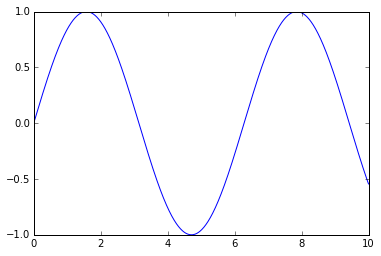

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.html.widgets import interact

def plot_sine(frequency=1.0, amplitude=1.0):
    plt.ylim(-1.0, 1.0);
    x = np.linspace(0, 10, 1000)
    plt.plot(x, amplitude*np.sin(x*frequency))

interact(plot_sine, frequency=(0.5, 10.0), amplitude=(0.0, 1.0));

Quízas lo mas simple de todos los gráficos es la visualización de una función sencilla y = f(x). Acá vamos a dar un primer vistazo a la creación de un gráficos simple de este tipo. Para todos los gráficos de matplotlib comenzamos creando una figura y unos ejes.  

Primero corremos el código a continuación para importar las librerias que utilizaremos en el ejemplo:

In [39]:
# Dependencias cargadas en el ejemplo al principio
#%matplotlib inline
#import numpy as np
#import matplotlib.pyplot as plt

La forma mas simple de crear una figura y sus ejes es la siguiente:

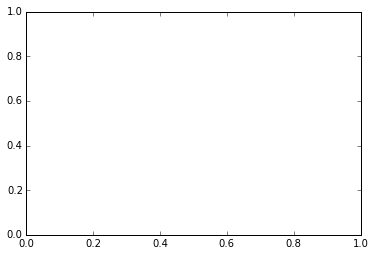

In [40]:
fig = plt.figure()
ax = plt.axes()

En matplotlib, la figura (una **instancia de la clase** `plt.Figure`) puede pensarse como un recipiente que contiene todo los objetos que representan ejes, gráficos, textos, etiquetas, etc. Los ejes (una instancia de la clase `plt.Axes`) es lo que vimos arriba: una caja delimitadora que contiene marcas y etiquetas, la cual eventualmente contendra otros elementos gráficos. En estos temas usaremos el nombre de variable `fig` para referirnos a una instancia a de figura y `ax` para referirnos a una **instancia de ejes** o a un conjunto de estos.  

Una vez que creamos los ejes podemos usar la función `ax.plot` para plotear algunos datos. Empecemos con una onda sinusoidal sencilla (*en los ejemplos usamos las ufunc [numpy.sin](http://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html) y [numpy.cos](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cos.html#numpy.cos) y también [numpy.linspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)*):

In [7]:
x = np.linspace(0, 10, 1000)

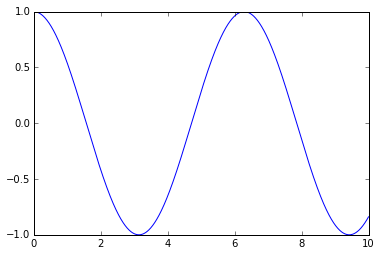

In [8]:
fig = plt.figure()
ax = plt.axes()

ax.plot(x, np.cos(x));

Alternativamente podemos usar la interfase pylab (`matplotlib.pyplot as plt`) y dejar que la figura y los ejes sean creados por nosotros en segundo plano.

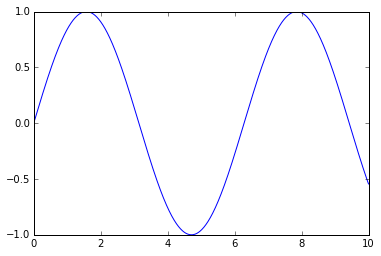

In [42]:
plt.plot(x, np.sin(x));

Si queremos crear una figura con multiples líneas podemos simplemente llamar a la función `plot` varías varias veces:

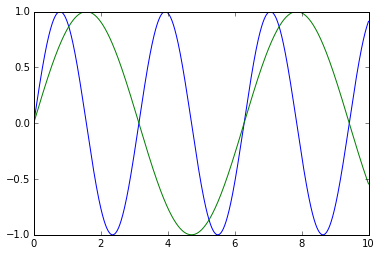

In [44]:
plt.plot(x, np.sin(x*2))
plt.plot(x, np.sin(x));

¡Eso es todo para gráficar funciones simples en matplotlib! A continuación vamos a bucear en algunos detalles más sobre cómo controlar la apariencia de los ejes y líneas.

### Ajustando el gráfico: Colores y estílos de líneas

El primer ajuste que quizas quieran hacer a un gráfico es controlar los colores y estilos de líneas. La función `plt.plot()` toma argumentos adicionales que pueden ser usados para especificar lo anterio.  
Para ajustar el color se puede usar la palabra clave (*keyword*) `color`, la cual acepta un argumento como cadena (*string*) que representa, virtualmente, cualquier color imaginable. El color se puede especificar en una variedad de maneras, las cuales se muestran a continuación:  

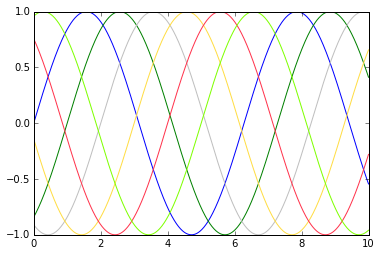

In [45]:
plt.plot(x, np.sin(x - 0), color='blue')        # Especificar por nombre
plt.plot(x, np.sin(x - 1), color='g')           # Código de colores corto(para rgb (Red/Green/Blue) & cmyk
                                                #                              (Cyan/Magenta/Yellow/blacK))
plt.plot(x, np.sin(x - 2), color='0.75')        # Escala de grises entre 0 y 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Código de color (RRGGBB desde 00 hasta FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # Tupla RGB, entre 0 y 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # Todos los nombres de colores html están soportados

Si el color no es especificado matplotlib cambiara automáticamente entre un grupo de colores por defecto para las líneas.  

Del mismo modo, el estilo de línea puede ser ajustado con la keyword `linestyle`:

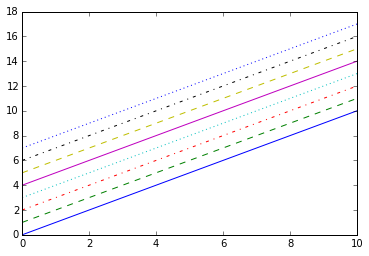

In [47]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted')

# Para abreviar se pueden utilizar los siguientes códigos:
plt.plot(x, x + 4, linestyle='-')  # sólida
plt.plot(x, x + 5, linestyle='--') # discontinua
plt.plot(x, x + 6, linestyle='-.') # guión punto
plt.plot(x, x + 7, linestyle=':'); # punteada

Si se quiere ser extremadamente breve, estos códigos para estilos de línea y colores pueden ser combiandos en un argumento que no es keyword en la función `plt.plot()`:

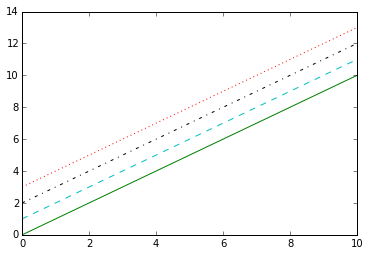

In [48]:
plt.plot(x, x + 0, '-g')  # sólida verde
plt.plot(x, x + 1, '--c') # discontinua cian
plt.plot(x, x + 2, '-.k') # guion punto negra
plt.plot(x, x + 3, ':r'); # punteada roja

Estos códigos de colores simples reflejan la abreviación estandar en los sistemas de colores RGB y CMYK, comunmente usados para gráficos digitales a color.

Hay muchas otros argumentos keyword que pueden ser usados para refinar el gráficos: para mas información revisar la documentación de matplotlib o la documentación de la función `plt.plot()`.

In [ ]:
# Documentación de función
plt.plot()

### Ajustando el gráfico: límites de los ejes

matplotlib hace un buen trabajo eligiendo los límites por defecto para un gráfico, pero a veces es bueno tener un control mas fino. Veremos brevemente como cambiar los límities de los ejes x e y. La forma más básica para hacer esto es usar los métodos `plt.xlim()` y `plt.ylim()` para ajustar numericamente los límites de los ejes x e y.

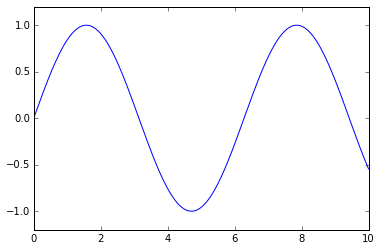

In [49]:
plt.plot(x, np.sin(x))

plt.xlim(0, 10)
plt.ylim(-1.2, 1.2);

Si por alguna razón se quiere mostrar los ejes a la inversa, simplemente hay que invertir el orden de los argumentos:

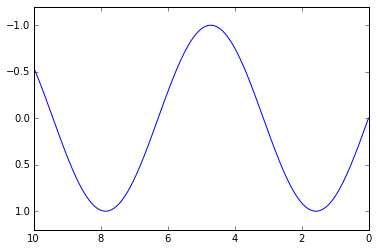

In [50]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

Un método útil relacionado con esto es `plt.axis()` (*Aclaración de la versión en inglés: note here the potential confusion between **axes** with an **e**, and **axis** with an **i***). Este método permite ajustar los límites de los ejes x e y en una sola sentencia al pasarle una lista que especifique `[xmin, xmax, ymin, ymax]`:

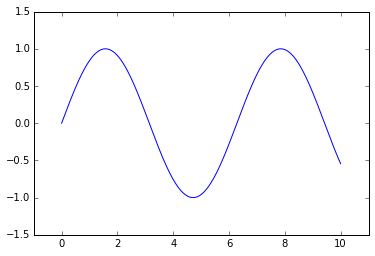

In [51]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

El método `plt.axis()` va mas allá de esto, permite *apretar* automáticamente los límites del gráfico actual:

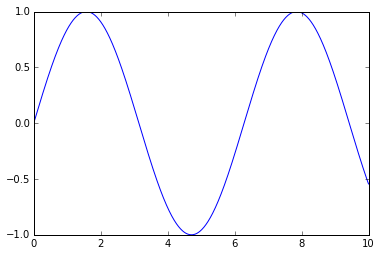

In [52]:
plt.plot(x, np.sin(x))
plt.axis('tight');

Permite incluso especificaciones de alto nivel, como asegurar una relación de aspecto equtativa, que una unidad en el eje x sea igual a una unidad en el eje y:

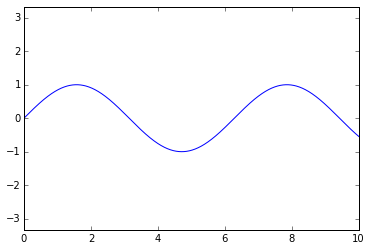

In [53]:
plt.plot(x, np.sin(x))
plt.axis('equal');

Para mas información sobre los límites de los ejes u otras capacidades del método `plt.axis` remitirse a la documentación de matplotlib.

### Etiquetado de gráficos

Veremos brevemente el etiquetado de gráficos: títulos, etiquetas de ejes y leyendas simples.

Los títulos y las etiquetas de los ejes son los mas simples de estos, hay métodos que pueden ser utililzados para configurarlos:

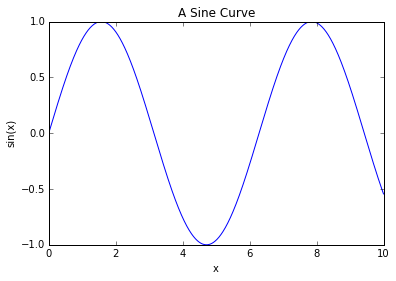

In [55]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
#plt.xlabel(r"x $\phi$")#Extra símbolo
plt.ylabel("sin(x)");

La posición, tamaño y estilo de estas etiquetas pueden ser ajustadas usando argumentos opcionales para la función. Para mas información ver la documentación de matplotlib y la documentación de estas funciones.

In [ ]:
# Documentación de funciones
plt.title()
plt.xlabel()
plt.ylabel()

Cuando se muestran multiples líneas dentro de los mismos ejes puede ser útil crear una leyenda que etiquete cada tipo de línea. Nuevamente, matplotlib tiene una forma integrada de crear estas leyendas. Se hace mediante el método (adivinaron) `plt.legend()`. Aunque hay varias formas validas de usar esto, lo mas fácil es especificar la etiqueta de cada línea usando la keyword `label` de la función plot:

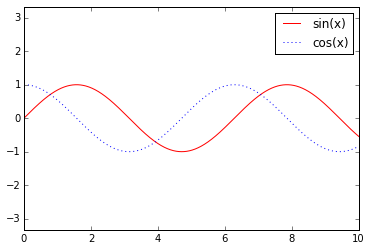

In [12]:
plt.plot(x, np.sin(x), '-r', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

Como se puede ver, la función `plt.legend()` lleva un registro del estilo de línea y color, y hace coincidir estos con la etiqueta correcta. Se puede encontrar mas información sobre la especificación y el formato de las leyendas en la documentación de la función `plt.legend()`.

In [ ]:
# Documentación de función
plt.legend()

### Barra lateral: Trampas (Sidebar: Gotchas)

Mientras que la mayoría de las funciones `plt` traducen directamente a los métodos `ax` (como `plt.plot()` & `ax.plot()`), no siempre es el caso. En particular, las funciones que formatean los límites, etiquetas y títulos estan ligeramente modificadas. Para una transición entre las funciones del estilo matlab y métodos orientados a objetos, realizar los siguientes cambios:  

- `plt.xlabel()` & `plt.ylabel()` se convierten en `ax.set_xlabel()` & `ax.set_ylabel()`
- `plt.xlim()` & `plt.ylim()` se convierten en `ax.set_xlim()` & `ax.set_ylim()`  
- `plt.title()` se convierte en `ax.set_title()`  

### Extra: Guardar las figuras
 
 Para guardar una figura podemos hacerlo con el comando [`matplotlib.pyplot.savefig(*args, **kwargs)`](http://matplotlib.org/api/pyplot_api.html?highlight=savefig#matplotlib.pyplot.savefig), el formato de salida se especifica en el nombre y la disponibilidad del mismo depende del *backend* que se este usando, la mayoría soporta png, pdf, ps, eps y svg.

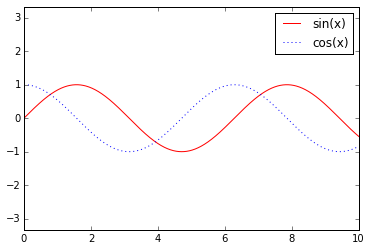

In [14]:
plt.plot(x, np.sin(x), '-r', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend()

figure_name = 'ejemplo_guardado_matplotlib'
figure_format = 'png'
plt.savefig('./img/%s.%s' % (figure_name, figure_format), dpi=200);

# Gráficando en tres dimensiones con matplotlib 

Como crear y mostrar una gran variedad de objetos 3D y patrones en matplotlib.  

Adaptado de [acá](https://www.oreilly.com/learning/three-dimensional-plotting-in-matplotlib)

matplotlib fue diseñando como una libreria de ploteo bidimensional. En la época de la versión 1.0, algunas utilidades de ploteo 3D fueron construídas sobre la visualización 2D de matplotlib, el resultado es un conveniente (aunque a veces limitado) grupo de herramientos de visualización de datos tridimensionales. Los gráficos 3D estan disponibles al importar el submódulo `mplot3d`:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

Una vez que es importado este submódulo, los ejes tridimensionales pueden ser creador pasandole la keyword `projection='3d'` a cualquiera de las rutinas normales de creación de ejes:

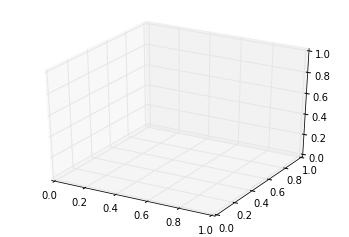

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Con estos ejes 3D disponibles, ahora podemos gráficar una variedad de tipos de gráficos tridimensionales, como veremos a continuación. El ploteo tridimensional es una de las funcionalidades de las cuales se beneficia inmensamente de visualizar figuras interactivamente mas que estaticamente en las notebook, recordemos que para utilizar figuras interactivas, también se puede correr un script con el comando `plt.show()`, o en las notebooks cambiar el *non-inline backend* usando el comando magic `%matplotlib` en vez del usual `%matplotlib inline`.

### Puntos y líneas 3D

El gráfico 3D más básico es una línea o collección de gráficos de dispersión creados desde un conjunto de tripletes (x, y, z). En analogía con lo discutido anteriormente con lo mas común de la bidimensional, estos pueden ser creados usando las funciones `ax.plot3D` y `ax.scatter3D`. La *llamada* para estas es casi identica a sus contrapartes bidimensional. Vamos a gráficar un espiral trigonométrica, junto con algunos datos dibujados sobre la línea:

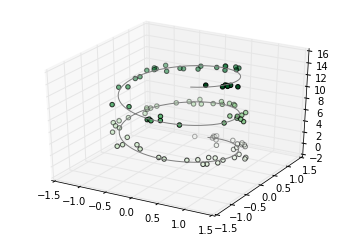

In [4]:
ax = plt.axes(projection='3d')

# Datos para una línea 3D
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Datos para los puntos 3D dispersos
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Observece que por defecto los puntos de dispersión tiene la transparencia ajustada para dar sensación de profundidad en la pagina. Mientras que el efecto 3D es dificil de ver con una imagen estática, una vista interactiva puede dar una buena intuición sobre la disposición de los puntos.

In [5]:
%matplotlib
ax = plt.axes(projection='3d')

# Datos para una línea 3D
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Datos para los puntos 3D dispersos
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Using matplotlib backend: TkAgg


### Gráficos de contornos 3D 

`mplot3d` contiene herramientas para crear gráficos de relieve tridimensional usando las mismas *entradas*. Al igual que los gráficos `ax.contour` bidimensionales, `ax.contour3D` necesita que todos los datos de entrada esten en forma de grilla regular bidimensional, con los datos Z evaluados en cada punto. Vamos a ver el diagrama de contorno 3D de una función sinusoidal tridimensional (función extra [`numpy.meshgrid`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)):

In [17]:
%matplotlib inline

In [2]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

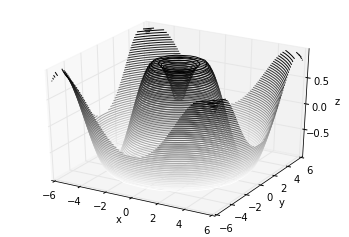

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

A veces el ángulo de vista por defecto no es el optimo, en estos casos podemos usar el método `view_init` para definir la elevación y el [ángulo azimut](https://es.wikipedia.org/wiki/Acimut). Vamos a utilizar una elevación de 60º (que es, 60º sobre el plano x-y) y un azimut de 35º (que es, rotar 35º anti-horario sobre el eje z):

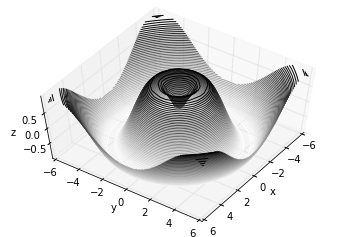

In [14]:
ax.view_init(60, 35)
fig

Nuevamente, remarcamos que este tipo de rotación se puede llevar a cabo clickeando y arrastando cuando se usa uno de los *backends* interactivos de matplotlib.

### Grafícos de esqueloto (sireframes) y de superficie

Otros dos tipos de gráficos 3D que trabajan con datos en grillas son los gráficos de esqueleto y de superficie. Estos toman una *grilla* de valores y los proyectan en una superficie tridimensional especifica, y pueden hace a la forma tridimensional resultante bastante facil de visualizar:

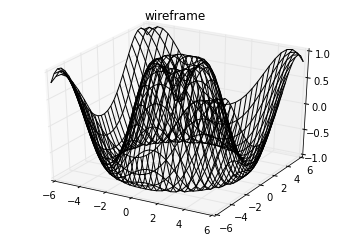

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

Un gráfico de superficie es como uno de esqueleto pero cada *cuadricula* del esqueleto es un poligono relleno. Agregar un mapa de colores a los poligonos rellenos puede ayudar a percibir la topología de las superficies que se estan visualizando:

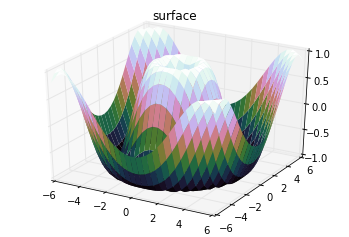

In [17]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='cubehelix', edgecolor='none')
ax.set_title('surface');

Observese que la grilla de valores para un gráfico de superficie tiene que ser bidimensional,no debe ser rectilinea. A continuación vemos un ejemplo de creación de una cuadricula polar parcial, la cual usada con `surface3D` puede darnos una rebanada de la función que estamos visualizando:

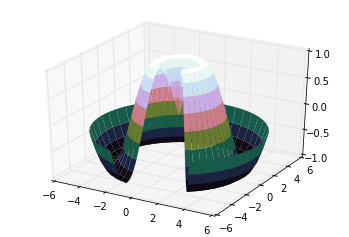

In [18]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='cubehelix', edgecolor='none');

### Triangulaciones de superficie

Para algunas aplicaciones, la grilla rectilinea requerida por las rutinas anteriores es excesivamente restrictiva e inconveniente. En estas situaciones, los gráficos basados en triangulaciones pueden ser muy útiles. ¿Y si en vez graficar desde una grilla cartesiana o polar tuvieramos un grupo de datos al azar? (Función extra [`numpy.ravel`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html))

In [15]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

Podríamos crear un gráfico de dispersión de los puntos (*scatterplot*) para tener una idea de la superficie que estamos muestreando con lo siguiente:

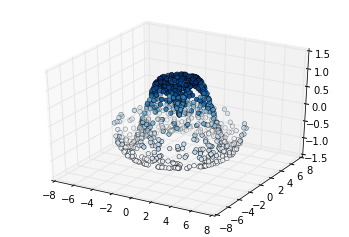

In [19]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='Blues', linewidth=0.5);

Esto deja mucho que desear. La función que nos ayudara en este caso es `ax.plot_trisurf`, la cual crea una superficie encontrando un grupo de triangulos formados entre puntos adyacentes. Recordemos que acá `x`, `y` y `z` estan en un *array* unidimensional.

In [14]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='Blues', edgecolor='none');

El resultado ciertamente no es tan claro como cuando es graficado con una grilla, pero la flexibilidad de estas triangulaciones permite graficos 3D realmente interesantes. Por ejemplo, actualmente es posible graficar una cinta de Moebius 3D, como veremos a continuación.

### Ejemplo de triangulación: Creando una cinta de Moebius

La clave para crear la cinta de Moebius es pensar en su parametrización: es una cinta bidimensional, entonces necesitamos intrinsicamente dos dimensiones. Llamaremos $\theta$ a una de las dimensiones, que abarca un rango de 0 a 2$\pi$ alrededor del bucle, y a la otra *w*, que tiene un rango entre -1 y 1 a través del ancho de la cinta.

Creando la parametrización:

In [8]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)

In [22]:
w

array([-0.25      , -0.17857143, -0.10714286, -0.03571429,  0.03571429,
        0.10714286,  0.17857143,  0.25      ])

In [9]:
w, theta = np.meshgrid(w, theta)

In [24]:
#w, theta

Ahora a partir de esta parametrización, debemos determinar las posiciones *x,y,z* de la cinta embebida.

La (*otra*) clave para crear la cinta de Moebius es reconocer que estan sucediendo 2 rotaciones: una es la posición del bucle alrededor de su centro (que llamamos $\theta$), mientras que la otra es la torsión de la tira alrededor de su eje (que llamaremos $\phi$). Para una cinta de Moebius, debemos hacer que la cinta haga media vuelta durante un bucle completo, o Δπ=Δθ/2. $\delta$$\pi$=$\delta$$\theta$/2.

In [10]:
phi = 0.5 * theta

In [27]:
#phi

Ahora usamos simple geometría para derivar la *incrustación* tridimensional. Definimos r, la distancia de cada punto al centro, y usamos esto para encontrar las coordenadas incrustradas *x,y,z*:

In [11]:
# radio en el plano x-y
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Finalmente, para graficar el objeto, debemos asegurarnos que la triangulación es correcta. La mejor manera de hacer esto es definir la triangulación *dentro de la parametrización subyacente*, y luego dejar que matplotlib proyecte esta triangulación en el espacio tridimensional de la cinta de Moebius. Esto se puede llevar a cabo de la siguiente manera:

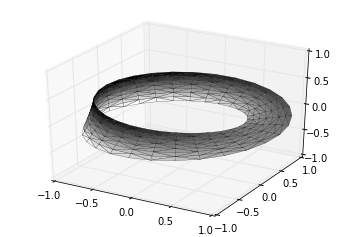

In [12]:
# triangulación dentro de la parametrización subyacente
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='binary', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

In [13]:
%matplotlib
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='binary', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

Using matplotlib backend: TkAgg


Combinando las técnicas anteriores, es posible crear y mostrar en matplotlib una gran variedad de objetos y patrones 3D.